 # Importing Libraries
 

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LassoCV, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import friedmanchisquare
from sklearn.model_selection import KFold

In [23]:
features='/nesi/project/aut03802/Data/features.csv'

In [24]:
df_features=pd.read_csv(features)

In [25]:
print("Total Data:",len(df_features))
print("Missing Data:",df_features.isnull().any(axis=1).sum())
print("Actual Instances of Data:",len(df_features)-df_features.isnull().any(axis=1).sum())

Total Data: 36855
Missing Data: 12239
Actual Instances of Data: 24616


In [26]:
df_features.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1, inplace=True)

In [27]:
df_features=df_features.dropna()

In [28]:
print("Total Data:",len(df_features))
print("Missing Data:",df_features.isnull().any(axis=1).sum())
print("Actual Instances of Data:",len(df_features)-df_features.isnull().any(axis=1).sum())

Total Data: 24616
Missing Data: 0
Actual Instances of Data: 24616


In [29]:
df_features.columns


Index(['Time', 'IG', 'Participant', 'HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew',
       'HR_Q1G', 'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew',
       'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew',
       'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew',
       'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew',
       'BVP_Q1G', 'BVP_Q3G', 'Gender', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum',
       'PeakEDA_2hrmean', 'maxHRV', 'minHRV', 'medianHRV', 'meanHRV', 'SDNN',
       'NN50', 'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr',
       'carbs2hr', 'calories8r', 'protien8hr', 'sugar8hr', 'carbs8hr',
       'calories24hr', 'protien24hr', 'sugar24hr', 'carbs24hr', 'Eat',
       'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr', 'Eatmean2hr', 'Eatmean8hr',
       'Eatmean24hr', 'WakeTime', 'Minfrommid', 'Hourfrommid', 'EDA_Min',
       'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min', 'Wake_Time',
       'HR_Mean_His

In [30]:
categorical_features=['Participant','Gender']

In [31]:
for categories in categorical_features:
    one_hot = pd.get_dummies(df_features[categories])
    df_features = df_features.drop(categories,axis = 1)
    df_features = df_features.join(one_hot)

In [32]:
df_features

,Time,IG,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,...,8,9,10,11,12,13,14,15,16,0
360,2020-06-06 22:38:07,123.0,85.522791,96.73,6.331191,0.301183,82.711911,88.557938,0.107646,0.334246,...,0,0,0,0,0,0,1,0,0,1
361,2020-06-06 22:43:07,120.0,73.521229,83.62,3.577057,1.301377,72.230039,75.169332,0.124278,0.687702,...,0,0,0,0,0,0,1,0,0,1
362,2020-06-06 22:48:07,116.0,80.800100,89.32,5.259070,0.120189,78.376860,83.289590,0.135629,0.274056,...,0,0,0,0,0,0,1,0,0,1
363,2020-06-06 22:53:07,114.0,86.216910,113.43,11.839511,0.679391,81.284393,92.241820,0.121341,0.236918,...,0,0,0,0,0,0,1,0,0,1
364,2020-06-06 22:58:07,115.0,85.380565,152.27,25.591415,1.428159,76.805712,99.346430,0.135862,0.151115,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,2020-03-07 11:21:05,103.0,70.964651,72.95,1.123637,0.123187,70.436015,71.483872,0.403972,0.576484,...,0,0,0,0,0,0,0,0,0,1
34292,2020-03-07 11:26:06,99.0,71.721096,73.45,1.242486,-0.544442,71.130848,72.252275,0.456856,0.490692,...,0,0,0,0,0,0,0,0,0,1
34293,2020-03-07 11:31:05,96.0,72.121329,73.90,1.141181,-0.190842,71.575090,72.633087,0.437563,0.486850,...,0,0,0,0,0,0,0,0,0,1
34294,2020-03-07 11:36:06,93.0,71.359269,73.82,1.344383,0.302611,70.779177,72.014969,0.415945,0.498375,...,0,0,0,0,0,0,0,0,0,1


In [33]:
numerical_features= [ 'HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew',
       'HR_Q1G', 'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew',
       'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew',
       'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew',
       'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew',
       'BVP_Q1G', 'BVP_Q3G', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum',
       'PeakEDA_2hrmean', 'maxHRV', 'minHRV', 'medianHRV', 'meanHRV', 'SDNN',
       'NN50', 'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr',
       'carbs2hr', 'calories8r', 'protien8hr', 'sugar8hr', 'carbs8hr',
       'calories24hr', 'protien24hr', 'sugar24hr', 'carbs24hr', 'Eat',
       'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr', 'Eatmean2hr', 'Eatmean8hr',
       'Eatmean24hr', 'WakeTime', 'Minfrommid', 'Hourfrommid', 'EDA_Min',
       'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min', 'Wake_Time',
       'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical',
       'ACC_Std_Historical', 'Activity_Bouts', 'Mean', 'Std'
                   , 'Activity24', 'Activity1h']

In [13]:
X = df_features.drop(columns=['IG', 'glucose_level','Time', 'Date'])
y = df_features['IG']

In [14]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [15]:
X

,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,EDA_Std,EDA_Skew,...,8,9,10,11,12,13,14,15,16,0
360,0.524436,0.334666,0.077868,-0.006593,0.562128,0.483362,-0.382849,-0.368466,-0.251072,0.610356,...,0,0,0,0,0,0,1,0,0,1
361,-0.273793,-0.245528,-0.414922,1.369034,-0.210905,-0.313541,-0.376593,-0.277898,-0.226365,2.081326,...,0,0,0,0,0,0,1,0,0,1
362,0.210328,0.006730,-0.113964,-0.255524,0.242420,0.169785,-0.372323,-0.383888,-0.262960,0.127707,...,0,0,0,0,0,0,1,0,0,1
363,0.570602,1.073738,1.063456,0.513580,0.456849,0.702630,-0.377698,-0.393404,-0.248525,-0.417580,...,0,0,0,0,0,0,1,0,0,1
364,0.514977,2.792633,3.524045,1.543405,0.126549,1.125503,-0.372235,-0.415390,-0.269406,-0.044519,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,-0.443833,-0.717737,-0.853905,-0.251401,-0.343213,-0.532903,-0.271382,-0.306396,-0.261276,1.878023,...,0,0,0,0,0,0,0,0,0,1
34292,-0.393521,-0.695609,-0.832640,-1.169631,-0.291970,-0.487167,-0.251488,-0.328379,-0.251098,-0.503758,...,0,0,0,0,0,0,0,0,0,1
34293,-0.366901,-0.675694,-0.850766,-0.683303,-0.259207,-0.464501,-0.258746,-0.329363,-0.248419,-0.339398,...,0,0,0,0,0,0,0,0,0,1
34294,-0.417586,-0.679234,-0.814408,-0.004629,-0.317905,-0.501292,-0.266878,-0.326410,-0.258530,0.027128,...,0,0,0,0,0,0,0,0,0,1


In [16]:
X.columns = X.columns.astype(str)

In [71]:
# Define models
models = {
    'DT': DecisionTreeRegressor(),
    'SVM': SVR(),
    'RF': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'LassoCV': LassoCV(),
    'Ridge': Ridge(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBOOST': XGBRegressor()
}

In [17]:


# Initialize performance metric lists
results = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'model :{name}')
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        r2 = r2_score(y_test, y_pred)
        n, p = X_test.shape
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        msle = mean_squared_error(y_test, y_pred, squared=False)
        ev = explained_variance_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        """
        print(f'mae :{mae}')
        print(f'mape:{mape}')
        print(f'r2:{r2}')
        print(f'adj_r2:{adj_r2}')
        print(f'msle:{msle}')
        print(f'ev:{ev}')
        print(f'rmse:{rmse}')
        """
        
        
        
        results.append({
            'Model': name,
            'Fold': fold,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2,
            'Adjusted R2': adj_r2,
            'MSLE': msle,
            'Explained Variance': ev,
            'RMSE': rmse
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('model_performance_metrics.csv', index=False)

print("Model performance metrics have been saved to 'model_performance_metrics.csv'.")

# Calculate mean and standard deviation for each metric for each model
mean_metrics = results_df.groupby('Model').mean()
std_metrics = results_df.groupby('Model').std()

# Display the mean performance metrics for each model
print("\nMean performance metrics for each model:")
print(mean_metrics)



model :DT


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.253046303818034
mape:5.23888646311926
r2:0.7301175839670646
adj_r2:0.7191625260646706
msle:11.841338733677304
ev:0.730246431393174
rmse:11.841338733677304


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.402924451665313
mape:5.429714696494157
r2:0.7578653725249425
adj_r2:0.7480366519170754
msle:11.3461524163371
ev:0.7578826550654779
rmse:11.3461524163371


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.4447603574329815
mape:5.488599875776854
r2:0.7279179700582825
adj_r2:0.7168736255025088
msle:11.763078864414306
ev:0.7279288339123697
rmse:11.763078864414306


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.538586515028432
mape:5.489258835200524
r2:0.7161801654721748
adj_r2:0.7046593603496922
msle:12.151193474026199
ev:0.7162061049267422
rmse:12.151193474026199


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.974004874086109
mape:6.001350027399968
r2:0.680724175133143
adj_r2:0.6677641416501754
msle:12.44771355330439
ev:0.6807266893785726
rmse:12.44771355330439


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.5722989439480095
mape:5.592480857269161
r2:0.7222577738111271
adj_r2:0.7109836707607542
msle:12.145058132551462
ev:0.7222710847077357
rmse:12.145058132551462


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.715156440471353
mape:5.7257659816794195
r2:0.7073536540149911
adj_r2:0.6954695384419958
msle:12.453799219270596
ev:0.707356066593769
rmse:12.453799219270596


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.796424217797643
mape:5.77721907425785
r2:0.6877318334248184
adj_r2:0.6750508926501917
msle:12.313030794512255
ev:0.6877835588142132
rmse:12.313030794512255


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.443722064201544
mape:5.513553722871407
r2:0.7086040454385873
adj_r2:0.6967707071822864
msle:11.940254901762245
ev:0.7086381715916417
rmse:11.940254901762245


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.6054449410808616
mape:5.687942601632293
r2:0.685628119941082
adj_r2:0.672861749177268
msle:12.401157356430554
ev:0.6856805147754881
rmse:12.401157356430554
model :SVM


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.576618449459664
mape:10.174019440062812
r2:0.2462906938890208
adj_r2:0.2156961512308161
msle:19.788617265445644
ev:0.266556704444218
rmse:19.788617265445644


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.906131053463918
mape:10.374180166831263
r2:0.23771232933411046
adj_r2:0.2067695739920702
msle:20.131661064754393
ev:0.26328277349926654
rmse:20.131661064754393


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.705592820992335
mape:10.403954811954618
r2:0.2872515340715688
adj_r2:0.25831967245248655
msle:19.03878479216915
ev:0.3091455136260244
rmse:19.03878479216915


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.69235157409719
mape:10.172823087677898
r2:0.2610587592436897
adj_r2:0.2310636813948077
msle:19.606610319209825
ev:0.2884283806666136
rmse:19.606610319209825


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.579343208946634
mape:10.404075599150595
r2:0.2732207336667918
adj_r2:0.24371933427229364
msle:18.780529497308812
ev:0.29517051376046266
rmse:18.780529497308812


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :13.18599201377908
mape:10.778712918598675
r2:0.25799589452559823
adj_r2:0.2278764889756859
msle:19.850972874623643
ev:0.28186009240040966
rmse:19.850972874623643


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :13.042671831599533
mape:10.479485347455162
r2:0.24523861237795086
adj_r2:0.21458840374355292
msle:20.0002370880895
ev:0.27704672567747435
rmse:20.0002370880895


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.701637225791762
mape:10.567210208790561
r2:0.2927452657052354
adj_r2:0.2640242612668693
msle:18.530581185716553
ev:0.30938567313344023
rmse:18.530581185716553


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.2464763273174
mape:10.112909416063669
r2:0.2976123540303691
adj_r2:0.2690889978488613
msle:18.53788874115218
ev:0.3141400575729496
rmse:18.53788874115218


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :12.184869469137597
mape:10.158105767726672
r2:0.29995443201554506
adj_r2:0.2715261855999327
msle:18.50561519723063
ev:0.3141676043591025
rmse:18.50561519723063
model :RF


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.21372461413485
mape:4.390818711334375
r2:0.8561011234347717
adj_r2:0.8502599851048512
msle:8.646537149113465
ev:0.8561217147574234
rmse:8.646537149113465


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.290515840779854
mape:4.448239359786158
r2:0.8722618335769201
adj_r2:0.8670766902464272
msle:8.241011140767759
ev:0.8723281716533168
rmse:8.241011140767759


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.175495532087734
mape:4.461262481468331
r2:0.8785369534952783
adj_r2:0.8736065296202452
msle:7.859468253428155
ev:0.8785760210100444
rmse:7.859468253428155


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.329870024370431
mape:4.470471280690402
r2:0.8665765231453976
adj_r2:0.8611606018861833
msle:8.331317615405942
ev:0.8665766771919396
rmse:8.331317615405942


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.38482940698619
mape:4.657925039795059
r2:0.8687246130227073
adj_r2:0.8633958869551301
msle:7.981751849775155
ev:0.8687572039586293
rmse:7.981751849775155


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.22987002437043
mape:4.473515180793398
r2:0.8795721483819526
adj_r2:0.8746837451027423
msle:7.997276491117827
ev:0.8796163330719855
rmse:7.997276491117827


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.45587566030069
mape:4.59974833772912
r2:0.8655555719262367
adj_r2:0.8600958997201955
msle:8.441151807897182
ev:0.8656430278536346
rmse:8.441151807897182


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.241223080048761
mape:4.514821528294044
r2:0.8688267461318031
adj_r2:0.8634999134874093
msle:7.980383367457279
ev:0.868869403896827
rmse:7.980383367457279


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :4.986164160910199
mape:4.300815255006335
r2:0.878731744610409
adj_r2:0.8738071454067708
msle:7.702742929552092
ev:0.8789260666582795
rmse:7.702742929552092


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :5.130459162941894
mape:4.41986274436185
r2:0.8721154377813369
adj_r2:0.8669221560668734
msle:7.909507325726249
ev:0.872174055161365
rmse:7.909507325726249
model :KNN


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.745491470349311
mape:8.247306113492812
r2:0.5743954416427709
adj_r2:0.5571193158067058
msle:14.870194374901757
ev:0.5744075160579625
rmse:14.870194374901757


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.95978878960195
mape:8.404232691652625
r2:0.558155039559233
adj_r2:0.540219683871151
msle:15.32692792897679
ev:0.558192661492764
rmse:15.32692792897679


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.484240454914703
mape:8.124776306969446
r2:0.603076463448085
adj_r2:0.5869645566789586
msle:14.207723783550515
ev:0.6030789188367673
rmse:14.207723783550515


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.727376116978066
mape:8.080936372954431
r2:0.5593213740293481
adj_r2:0.541433362150624
msle:15.141139400844583
ev:0.5601805624895502
rmse:15.141139400844583


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.498781478472786
mape:8.138433936098588
r2:0.5755288352826954
adj_r2:0.5582987161229231
msle:14.352602743891586
ev:0.5758555866187208
rmse:14.352602743891586


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.878797725426482
mape:8.297248229007824
r2:0.565438130243202
adj_r2:0.5477984095258013
msle:15.191632653561214
ev:0.5660348811391717
rmse:15.191632653561214


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :10.223161316537993
mape:8.537030812485565
r2:0.5324382152313943
adj_r2:0.513450934631654
msle:15.74163400159677
ev:0.5335318439706098
rmse:15.74163400159677


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.550507923608288
mape:8.201792603424913
r2:0.5809478273529636
adj_r2:0.5639304802403935
msle:14.26379725847225
ev:0.5809479716671401
rmse:14.26379725847225


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.76294189353921
mape:8.36434035939732
r2:0.5429205831321151
adj_r2:0.5243589824471249
msle:14.95435449650541
ev:0.5430748893501738
rmse:14.95435449650541


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :9.547907354733848
mape:8.268759551068841
r2:0.5685551659583699
adj_r2:0.5510345635607402
msle:14.527905583183305
ev:0.568759144790557
rmse:14.527905583183305
model :LassoCV


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1920.1513881692663, tolerance: 866.0707166845344
  model = cd_fast.enet_coordinate_descent_gram(


mae :13.945681387189321
mape:11.726085399086282
r2:0.21746707070211768
adj_r2:0.18570252050651648
msle:20.163448994606412
ev:0.21749070339416354
rmse:20.163448994606412


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :14.349515904834576
mape:12.028840798078077
r2:0.2135330232677003
adj_r2:0.18160878235171685
msle:20.44845066711769
ev:0.21374769136845206
rmse:20.44845066711769


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 937.5856373431161, tolerance: 934.8364220391583
  model = cd_fast.enet_coordinate_descent_gram(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456.6887779766694, tolerance: 934.8364220391583
  model = cd_fast.enet_coordinate_descent_gram(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.9574885442853, tolerance: 947.2564620436721
  model = cd_fast.enet_coordinate_descent_gram(
/home

mae :14.207235189704596
mape:12.112693254693017
r2:0.23902540651815285
adj_r2:0.20813595156075015
msle:19.67234616222581
ev:0.23902808250172447
rmse:19.67234616222581


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :14.153428261813858
mape:11.822379781515513
r2:0.22675466344157236
adj_r2:0.1953671148962831
msle:20.05654948215329
ev:0.2273697170252138
rmse:20.05654948215329


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071.516302733682, tolerance: 956.1943361169104
  model = cd_fast.enet_coordinate_descent_gram(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :14.172896983576125
mape:12.194346982045003
r2:0.22461860748128526
adj_r2:0.1931443522247117
msle:19.398326075489095
ev:0.22468843918873804
rmse:19.398326075489095


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1450.5993275064975, tolerance: 871.8219852854886
  model = cd_fast.enet_coordinate_descent_gram(


mae :14.593018646406234
mape:12.439699924025327
r2:0.22781356331827918
adj_r2:0.19646899760096626
msle:20.250685377061075
ev:0.22784074922940456
rmse:20.250685377061075


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1448.5710379546508, tolerance: 878.3411568494707
  model = cd_fast.enet_coordinate_descent_gram(


mae :14.357094070308356
mape:12.009961741616253
r2:0.22790397705129872
adj_r2:0.19654982383510777
msle:20.228606416984874
ev:0.22901264437909052
rmse:20.228606416984874


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :14.212332268010053
mape:12.273115489745647
r2:0.23534605261541708
adj_r2:0.20429411566578926
msle:19.267864182806775
ev:0.23595592958984812
rmse:19.267864182806775


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :13.787758338429917
mape:11.859310165337337
r2:0.2505043663781499
adj_r2:0.2200679954696484
msle:19.14945387123574
ev:0.2509449115491297
rmse:19.14945387123574


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: '

mae :13.716770216104152
mape:11.914487224486058
r2:0.24667798718064304
adj_r2:0.2160862303148824
msle:19.196882255251598
ev:0.24758676136175728
rmse:19.196882255251598
model :Ridge
mae :13.86529497759638
mape:11.671191590164309
r2:0.2241934813961609
adj_r2:0.19270196943592044
msle:20.076602584351285
ev:0.22419524237567634
rmse:20.076602584351285
mae :14.278260158075769
mape:11.96729549653382
r2:0.22249600516984613
adj_r2:0.19093558931204702
msle:20.33159625282263
ev:0.2227427806085095
rmse:20.33159625282263
mae :14.049888289389825
mape:11.985034244213793
r2:0.2528910468885268
adj_r2:0.2225644255360103
msle:19.492298328078228
ev:0.2528954899779564
rmse:19.492298328078228
mae :14.073523001147223
mape:11.746755235519087
r2:0.234523135831038
adj_r2:0.2034509248542007
msle:19.95554527426773
ev:0.23520773506353854
rmse:19.95554527426773


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: '

mae :14.113104933473853
mape:12.137952744470896
r2:0.22681041713707195
adj_r2:0.19542513174390452
msle:19.370889559796613
ev:0.22684846927744262
rmse:19.370889559796613
mae :14.513952800975696
mape:12.372372371322532
r2:0.23669011725561895
adj_r2:0.20570586831546644
msle:20.133954576320384
ev:0.23670954349499795
rmse:20.133954576320384
mae :14.189623458487974
mape:11.866747023921857
r2:0.24381433011935083
adj_r2:0.21310628261150721
msle:20.01909904716255
ev:0.24489032831692925
rmse:20.01909904716255
mae :14.151881998261919
mape:12.23051961275804
r2:0.2429271612777486
adj_r2:0.21218308660882468
msle:19.1721113045516
ev:0.2434625461991159
rmse:19.1721113045516
mae :13.616248056971035
mape:11.716971888594626
r2:0.26626009352413393
adj_r2:0.23646354909871803
msle:18.9471070636952
ev:0.26662413990351086
rmse:18.9471070636952
mae :13.56501948601274
mape:11.788602754990244
r2:0.26349146570515913
adj_r2:0.23358248969318596
msle:18.981444693702798
ev:0.26456830146549226
rmse:18.981444693702798


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :18.66657200937389
mape:16.940059428991297
r2:0.029656644677166777
adj_r2:-0.009731499978643754
msle:22.453095738990992
ev:0.27307836911351147
rmse:22.453095738990992


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :17.838293101077735
mape:16.051563861817026
r2:0.09755209821716915
adj_r2:0.06091996351477946
msle:21.904393466623066
ev:0.26378091289736005
rmse:21.904393466623066


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :18.88540236831145
mape:17.222987988968498
r2:0.003478058303703735
adj_r2:-0.036972726644644904
msle:22.51202238523424
ev:0.2668023362756007
rmse:22.51202238523424


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :18.75704452789087
mape:16.946054681685766
r2:0.015265832799702506
adj_r2:-0.024706463205045326
msle:22.633778842136614
ev:0.24162020592736755
rmse:22.633778842136614


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :16.91993655365217
mape:15.339299162565966
r2:0.09387097403002975
adj_r2:0.057089415259155674
msle:20.97015251872547
ev:0.20821506689840374
rmse:20.97015251872547


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :18.545764842189886
mape:16.87220083006443
r2:0.04828547088030344
adj_r2:0.009653506907580045
msle:22.48184718737309
ev:0.24475001053883705
rmse:22.48184718737309


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :18.409690178629948
mape:16.64133283246271
r2:0.06576533540750973
adj_r2:0.027826871870758718
msle:22.251448919318634
ev:0.26138535361569415
rmse:22.251448919318634


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :18.139160838582985
mape:16.69927064790987
r2:0.00996556558064543
adj_r2:-0.03023887845668871
msle:21.9243263967094
ev:0.22628049387652138
rmse:21.9243263967094


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :17.751134093869823
mape:16.248160108898524
r2:0.04494416868088613
adj_r2:0.006160175530871337
msle:21.61654192142019
ev:0.24948569359334005
rmse:21.61654192142019


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :18.288832927064277
mape:16.870126930691
r2:0.0029592778535584285
adj_r2:-0.037529685482337705
msle:22.084970340697744
ev:0.25791528700776045
rmse:22.084970340697744
model :XGBOOST


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.288592935867372
mape:6.216368429190453
r2:0.7907988586880007
adj_r2:0.7823069730364354
msle:10.425467405000832
ev:0.790820084154533
rmse:10.425467405000832


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.537856174038253
mape:6.338692843953603
r2:0.7759575151892193
adj_r2:0.7668631902243842
msle:10.914035262781477
ev:0.7763266174589674
rmse:10.914035262781477


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.223538577701869
mape:6.2189860793613505
r2:0.8009856907034977
adj_r2:0.7929073085925191
msle:10.060353263692825
ev:0.8010142093709438
rmse:10.060353263692825


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.444744305335633
mape:6.304569262953789
r2:0.7859912649298253
adj_r2:0.7773042295950529
msle:10.55147840964754
ev:0.786030629811805
rmse:10.55147840964754


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.3692138107882394
mape:6.341209275003576
r2:0.7856089403639748
adj_r2:0.7769063857233581
msle:10.200228562949421
ev:0.7856205387196454
rmse:10.200228562949421


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.500386314794942
mape:6.40084770452297
r2:0.7886145832601692
adj_r2:0.7800340335743241
msle:10.595370628984197
ev:0.7886598308766
rmse:10.595370628984197


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.8496373628804665
mape:6.632251482396232
r2:0.7698949678877641
adj_r2:0.7605506011014804
msle:11.043160010236384
ev:0.7700770554325254
rmse:11.043160010236384


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.317877218036426
mape:6.322930643588756
r2:0.783767234329772
adj_r2:0.7749862083127069
msle:10.246177154606105
ev:0.7838450665663657
rmse:10.246177154606105


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :6.982219345731398
mape:6.0419613766174125
r2:0.7983966422340194
adj_r2:0.7902097038475837
msle:9.931634300763793
ev:0.7986042285709922
rmse:9.931634300763793


/home/wsf4491/.local/Python-3.9-gimkl-2020a/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mae :7.173415213859648
mape:6.200723675903343
r2:0.790770143318889
adj_r2:0.7822734993927525
msle:10.117010502893711
ev:0.7908178472794233
rmse:10.117010502893711
Model performance metrics have been saved to 'model_performance_metrics.csv'.

Mean performance metrics for each model:
          Fold        MAE       MAPE        R2  Adjusted R2       MSLE  \
Model                                                                    
AdaBoost   5.5  18.220183  16.583106  0.041174     0.002247  22.083258   
DT         5.5   6.574637   5.594477  0.712438     0.700763  12.080278   
KNN        5.5   9.737899   8.266486  0.566078     0.548461  14.857791   
LassoCV    5.5  14.149573  12.038092  0.230964     0.199743  19.783261   
RF         5.5   5.243803   4.473748  0.870700     0.865451   8.109115   
Ridge      5.5  14.041680  11.948344  0.241410     0.210612  19.648065   
SVM        5.5  12.682168  10.362548  0.269908     0.240267  19.277150   
XGBOOST    5.5   7.368748   6.301854  0.787079     

NameError: name 'metric' is not defined

In [72]:
import os
results_df=pd.read_csv('model_performance_metrics.csv')

In [73]:
results_df

,Model,Fold,MAE,MAPE,R2,Adjusted R2,MSLE,Explained Variance,RMSE
0,DT,1,6.253046,5.238886,0.730118,0.719163,11.841339,0.730246,11.841339
1,DT,2,6.402924,5.429715,0.757865,0.748037,11.346152,0.757883,11.346152
2,DT,3,6.444760,5.488600,0.727918,0.716874,11.763079,0.727929,11.763079
3,DT,4,6.538587,5.489259,0.716180,0.704659,12.151193,0.716206,12.151193
4,DT,5,6.974005,6.001350,0.680724,0.667764,12.447714,0.680727,12.447714
...,...,...,...,...,...,...,...,...,...
75,XGBOOST,6,7.500386,6.400848,0.788615,0.780034,10.595371,0.788660,10.595371
76,XGBOOST,7,7.849637,6.632251,0.769895,0.760551,11.043160,0.770077,11.043160
77,XGBOOST,8,7.317877,6.322931,0.783767,0.774986,10.246177,0.783845,10.246177
78,XGBOOST,9,6.982219,6.041961,0.798397,0.790210,9.931634,0.798604,9.931634


In [74]:
# Conduct Friedman's test for each metric across all models
metrics = ['MAE', 'MAPE', 'R2', 'Adjusted R2', 'MSLE', 'Explained Variance', 'RMSE']


In [75]:
mean_metrics = results_df.groupby('Model').mean()
std_metrics = results_df.groupby('Model').std()

# Display the mean performance metrics for each model
print("\nMean performance metrics for each model:")
mean_metrics


Mean performance metrics for each model:


,Fold,MAE,MAPE,R2,Adjusted R2,MSLE,Explained Variance,RMSE
Model,,,,,,,,
AdaBoost,5.5,18.220183,16.583106,0.041174,0.002247,22.083258,0.249331,22.083258
DT,5.5,6.574637,5.594477,0.712438,0.700763,12.080278,0.712472,12.080278
KNN,5.5,9.737899,8.266486,0.566078,0.548461,14.857791,0.566406,14.857791
LassoCV,5.5,14.149573,12.038092,0.230964,0.199743,19.783261,0.231367,19.783261
RF,5.5,5.243803,4.473748,0.870700,0.865451,8.109115,0.870759,8.109115
Ridge,5.5,14.041680,11.948344,0.241410,0.210612,19.648065,0.241814,19.648065
SVM,5.5,12.682168,10.362548,0.269908,0.240267,19.277150,0.291918,19.277150
XGBOOST,5.5,7.368748,6.301854,0.787079,0.778434,10.408492,0.787182,10.408492


In [11]:
dt_results = results_df[results_df['Model']=='DT']['MAE']

In [12]:
print("\nSTD performance metrics for each model:")
std_metrics


STD performance metrics for each model:


,Fold,MAE,MAPE,R2,Adjusted R2,MSLE,Explained Variance,RMSE
Model,,,,,,,,
AdaBoost,3.02765,0.590638,0.557098,0.035409,0.036849,0.508258,0.019998,0.508258
DT,3.02765,0.210184,0.212743,0.023809,0.024777,0.358569,0.023811,0.358569
KNN,3.02765,0.235253,0.140695,0.019808,0.020614,0.510113,0.019569,0.510113
LassoCV,3.02765,0.268185,0.220732,0.011908,0.012387,0.500021,0.012054,0.500021
RF,3.02765,0.133104,0.101099,0.007250,0.007544,0.294099,0.007274,0.294099
Ridge,3.02765,0.290313,0.235759,0.015571,0.016198,0.514512,0.015762,0.514512
SVM,3.02765,0.315144,0.212912,0.023397,0.024344,0.662910,0.019434,0.662910
XGBOOST,3.02765,0.235847,0.154296,0.009337,0.009716,0.367772,0.009284,0.367772


In [8]:

res = friedmanchisquare(
    results_df[results_df['Model']=='DT']['MAE'], 
    results_df[results_df['Model']=='RF']['MAE'],
    results_df[results_df['Model']=='SVM']['MAE'],
    results_df[results_df['Model']=='KNN']['MAE'],
    results_df[results_df['Model']=='AdaBoost']['MAE'],
    results_df[results_df['Model']=='Ridge']['MAE'],
    results_df[results_df['Model']=='XGBOOST']['MAE'],
    
    
    
)

In [ ]:
results_df

In [40]:
res.statistic

60.0

In [41]:
res.pvalue

4.501016648012131e-11

In [16]:
import scikit_posthocs as sp

In [76]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'MAE'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_mae.csv')

Friedman's test statistic: 70.0
Friedman's test p-value: 1.4774294932825123e-12


In [77]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'MAE'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_mae.csv')

Friedman's test statistic: 70.0
Friedman's test p-value: 1.4774294932825123e-12


In [41]:
metric_values

[array([11.84133873, 11.34615242, 11.76307886, 12.15119347, 12.44771355,
        12.14505813, 12.45379922, 12.31303079, 11.9402549 , 12.40115736]),
 array([19.78861727, 20.13166106, 19.03878479, 19.60661032, 18.7805295 ,
        19.85097287, 20.00023709, 18.53058119, 18.53788874, 18.5056152 ]),
 array([8.64653715, 8.24101114, 7.85946825, 8.33131762, 7.98175185,
        7.99727649, 8.44115181, 7.98038337, 7.70274293, 7.90950733]),
 array([14.87019437, 15.32692793, 14.20772378, 15.1411394 , 14.35260274,
        15.19163265, 15.741634  , 14.26379726, 14.9543545 , 14.52790558]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([20.07660258, 20.33159625, 19.49229833, 19.95554527, 19.37088956,
        20.13395458, 20.01909905, 19.1721113 , 18.94710706, 18.98144469]),
 array([22.45309574, 21.90439347, 22.51202239, 22.63377884, 20.97015252,
        22.48184719, 22.25144892, 21.9243264 , 21.61654192, 22.08497034]),
 array([10.42546741, 10.91403526, 10.06035326, 10.55147841, 10.20022

In [12]:
metric_values

[array([6.2530463 , 6.40292445, 6.44476036, 6.53858652, 6.97400487,
        6.57229894, 6.71515644, 6.79642422, 6.44372206, 6.60544494]),
 array([12.57661845, 12.90613105, 12.70559282, 12.69235157, 12.57934321,
        13.18599201, 13.04267183, 12.70163723, 12.24647633, 12.18486947]),
 array([5.21372461, 5.29051584, 5.17549553, 5.32987002, 5.38482941,
        5.22987002, 5.45587566, 5.24122308, 4.98616416, 5.13045916]),
 array([ 9.74549147,  9.95978879,  9.48424045,  9.72737612,  9.49878148,
         9.87879773, 10.22316132,  9.55050792,  9.76294189,  9.54790735]),
 array([13.94568139, 14.3495159 , 14.20723519, 14.15342826, 14.17289698,
        14.59301865, 14.35709407, 14.21233227, 13.78775834, 13.71677022]),
 array([13.86529498, 14.27826016, 14.04988829, 14.073523  , 14.11310493,
        14.5139528 , 14.18962346, 14.151882  , 13.61624806, 13.56501949]),
 array([18.66657201, 17.8382931 , 18.88540237, 18.75704453, 16.91993655,
        18.54576484, 18.40969018, 18.13916084, 17.75113409,

In [3]:
nemenyi_result = pd.read_csv('nemenyi_test_results.csv')

In [18]:
nemenyi_result

,AdaBoost,DT,KNN,LassoCV,RF,Ridge,SVM,XGBOOST
AdaBoost,1.000000,0.001000,0.006352,0.900000,0.001000,0.587906,0.111334,0.001000
DT,0.001000,1.000000,0.587906,0.001000,0.900000,0.006352,0.111334,0.900000
KNN,0.006352,0.587906,1.000000,0.111334,0.111334,0.587906,0.900000,0.900000
LassoCV,0.900000,0.001000,0.111334,1.000000,0.001000,0.900000,0.587906,0.006352
RF,0.001000,0.900000,0.111334,0.001000,1.000000,0.001000,0.006352,0.587906
Ridge,0.587906,0.006352,0.587906,0.900000,0.001000,1.000000,0.900000,0.111334
SVM,0.111334,0.111334,0.900000,0.587906,0.006352,0.900000,1.000000,0.587906
XGBOOST,0.001000,0.900000,0.900000,0.006352,0.587906,0.111334,0.587906,1.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
nemenyi_result

,AdaBoost,DT,KNN,LassoCV,RF,Ridge,SVM,XGBOOST
AdaBoost,1.000000,0.001000,0.006352,0.900000,0.001000,0.587906,0.111334,0.001000
DT,0.001000,1.000000,0.587906,0.001000,0.900000,0.006352,0.111334,0.900000
KNN,0.006352,0.587906,1.000000,0.111334,0.111334,0.587906,0.900000,0.900000
LassoCV,0.900000,0.001000,0.111334,1.000000,0.001000,0.900000,0.587906,0.006352
RF,0.001000,0.900000,0.111334,0.001000,1.000000,0.001000,0.006352,0.587906
Ridge,0.587906,0.006352,0.587906,0.900000,0.001000,1.000000,0.900000,0.111334
SVM,0.111334,0.111334,0.900000,0.587906,0.006352,0.900000,1.000000,0.587906
XGBOOST,0.001000,0.900000,0.900000,0.006352,0.587906,0.111334,0.587906,1.000000


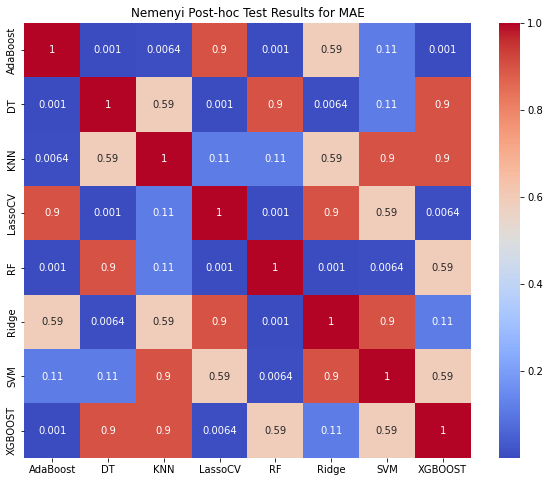

In [78]:

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True)
plt.title(f'Nemenyi Post-hoc Test Results for MAE')
plt.savefig('nemeyni_post_hoc_mae.svg')

plt.show()

In [ ]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'MAPE'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_mape.csv')

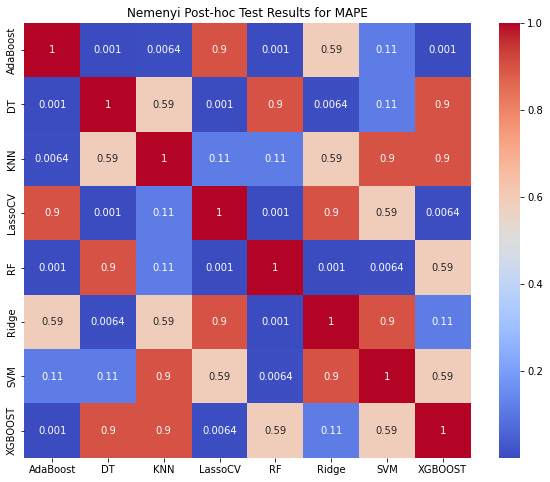

In [79]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True)
plt.title(f'Nemenyi Post-hoc Test Results for MAPE')
plt.savefig('nemeyni_post_hoc_mape.svg')

plt.show()

In [ ]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'MAPE'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_mape.csv')

In [23]:
nemenyi_result

,AdaBoost,DT,KNN,LassoCV,RF,Ridge,SVM,XGBOOST
AdaBoost,1.000000,0.001000,0.006352,0.900000,0.001000,0.587906,0.111334,0.001000
DT,0.001000,1.000000,0.587906,0.001000,0.900000,0.006352,0.111334,0.900000
KNN,0.006352,0.587906,1.000000,0.111334,0.111334,0.587906,0.900000,0.900000
LassoCV,0.900000,0.001000,0.111334,1.000000,0.001000,0.900000,0.587906,0.006352
RF,0.001000,0.900000,0.111334,0.001000,1.000000,0.001000,0.006352,0.587906
Ridge,0.587906,0.006352,0.587906,0.900000,0.001000,1.000000,0.900000,0.111334
SVM,0.111334,0.111334,0.900000,0.587906,0.006352,0.900000,1.000000,0.587906
XGBOOST,0.001000,0.900000,0.900000,0.006352,0.587906,0.111334,0.587906,1.000000


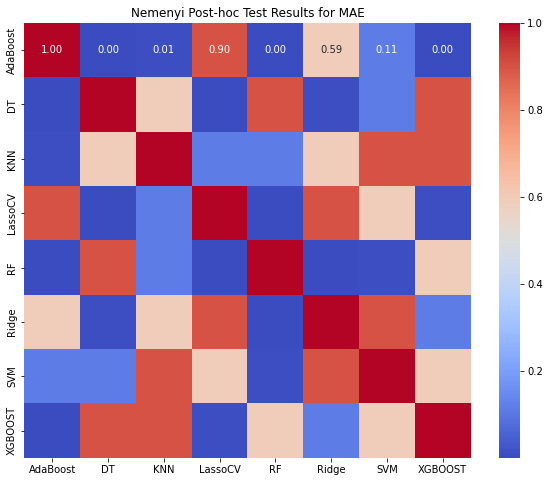

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for MAE')

plt.show()

In [80]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'R2'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_R2.csv')

Friedman's test statistic: 70.0
Friedman's test p-value: 1.4774294932825123e-12


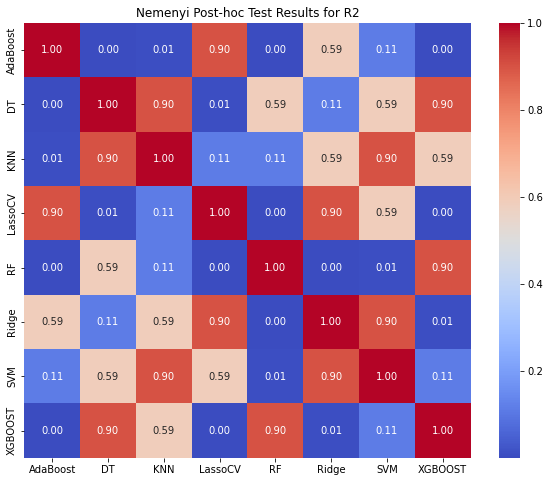

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for R2')
plt.savefig('Nemenyi Post-hoc Test Results for r2.svg')
plt.show()

In [88]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'MSLE'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_msle.csv')

Friedman's test statistic: 70.0
Friedman's test p-value: 1.4774294932825123e-12


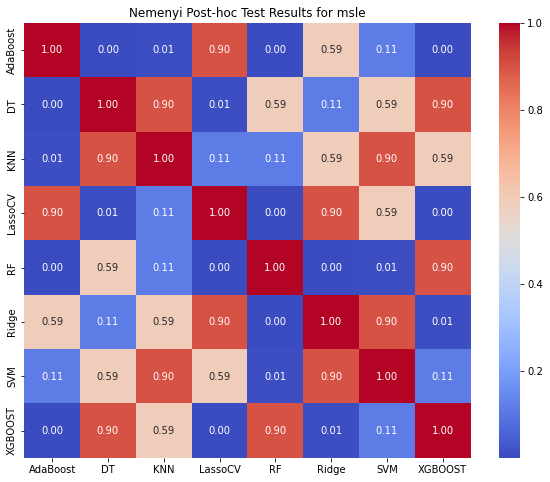

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for msle')
plt.savefig('Nemenyi Post-hoc Test Results for msle.svg')
plt.show()

Friedman's test statistic: 70.0
Friedman's test p-value: 1.4774294932825123e-12


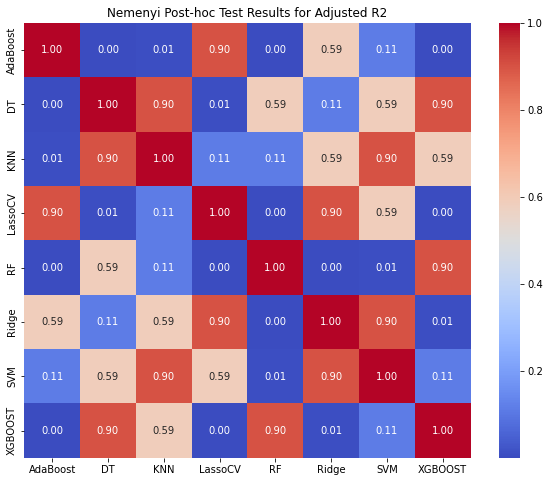

In [90]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'Adjusted R2'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_adjr2.csv')
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for Adjusted R2')
plt.savefig('Nemenyi Post-hoc Test Results for adjr2.svg')
plt.show()

Friedman's test statistic: 66.89999999999998
Friedman's test p-value: 6.236465895285127e-12


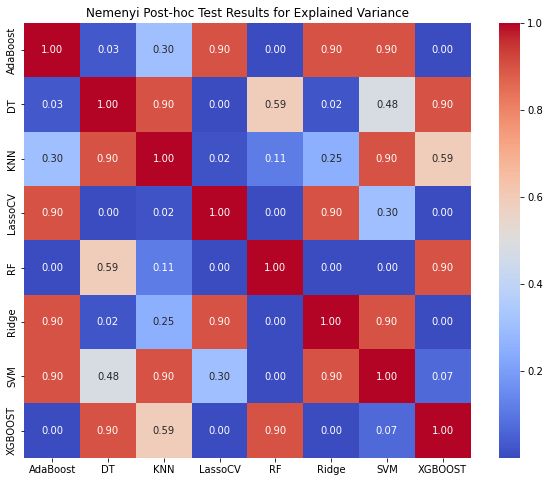

In [91]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'Explained Variance'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_explained_variance.csv')
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for Explained Variance')
plt.savefig('Nemenyi Post-hoc Test Results for explained_variance.svg')
plt.show()

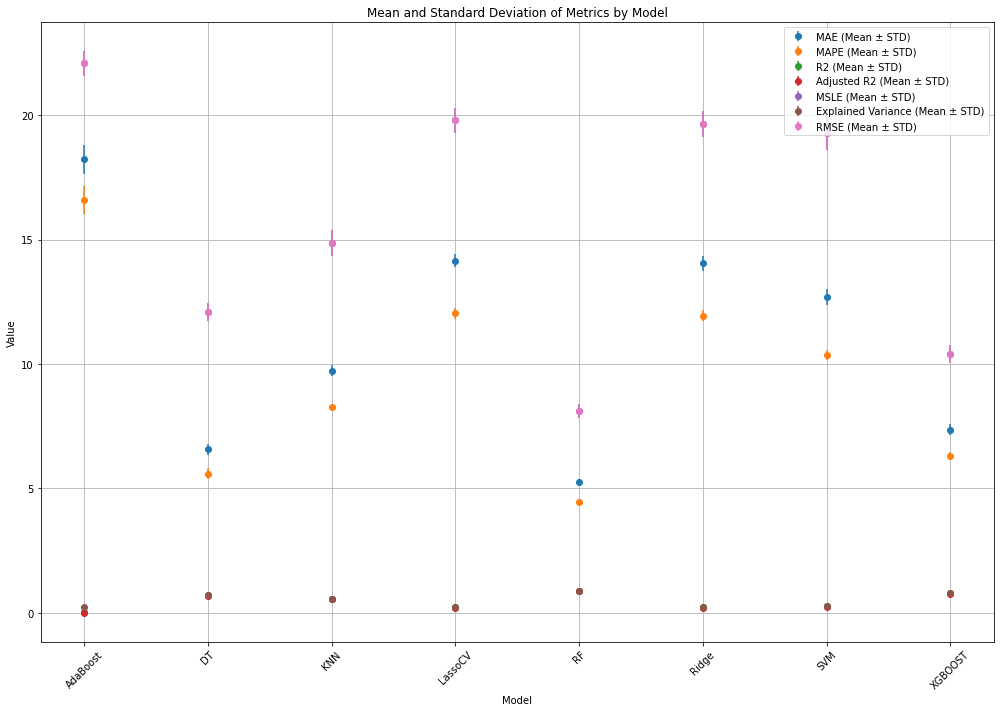

In [53]:
metrics = ['MAE', 'MAPE', 'R2', 'Adjusted R2', 'MSLE', 'Explained Variance', 'RMSE']
summary_df = results_df.groupby('Model')[metrics].agg(['mean', 'std'])

# Plotting
plt.figure(figsize=(14, 10))

for metric in metrics:
    mean_values = summary_df[(metric, 'mean')]
    std_values = summary_df[(metric, 'std')]
    
    plt.errorbar(
        x=summary_df.index, 
        y=mean_values, 
        yerr=std_values, 
        fmt='o', 
        label=f'{metric} (Mean ± STD)'
    )

plt.title('Mean and Standard Deviation of Metrics by Model')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

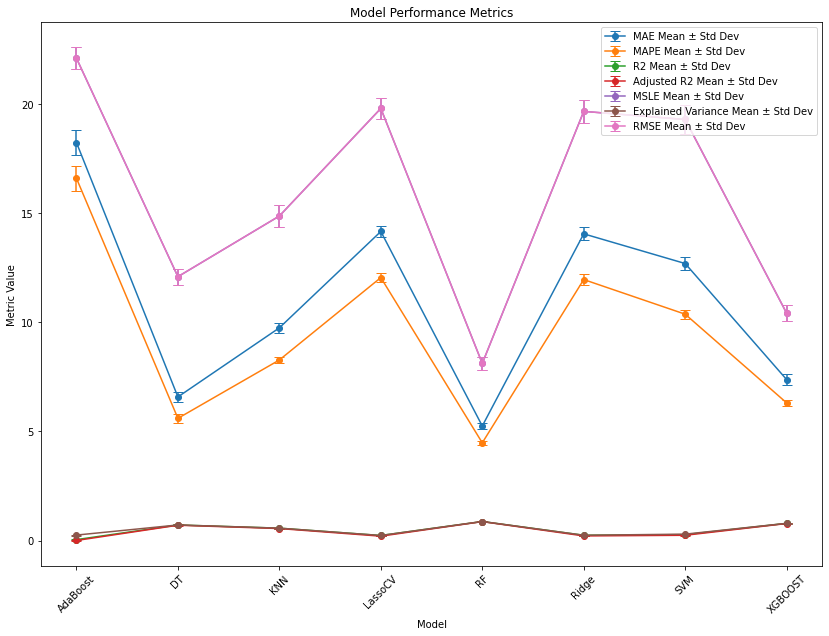

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame
# results_df = pd.read_csv('path_to_your_results_df.csv')

# Calculate mean and standard deviation for each metric and each model
metrics = ['MAE', 'MAPE', 'R2', 'Adjusted R2', 'MSLE', 'Explained Variance', 'RMSE']
summary_df = results_df.groupby('Model')[metrics].agg(['mean', 'std'])

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))

for metric in metrics:
    y = summary_df[(metric, 'mean')]
    yerr = summary_df[(metric, 'std')]
    
    ax.errorbar(summary_df.index, y, yerr=yerr, label=f'{metric} Mean ± Std Dev', fmt='-o', capsize=5)

# Customizing the plot
ax.set_title('Model Performance Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Metric Value')
ax.legend()
ax.set_xticks(summary_df.index)
ax.set_xticklabels(summary_df.index, rotation=45)

plt.show()


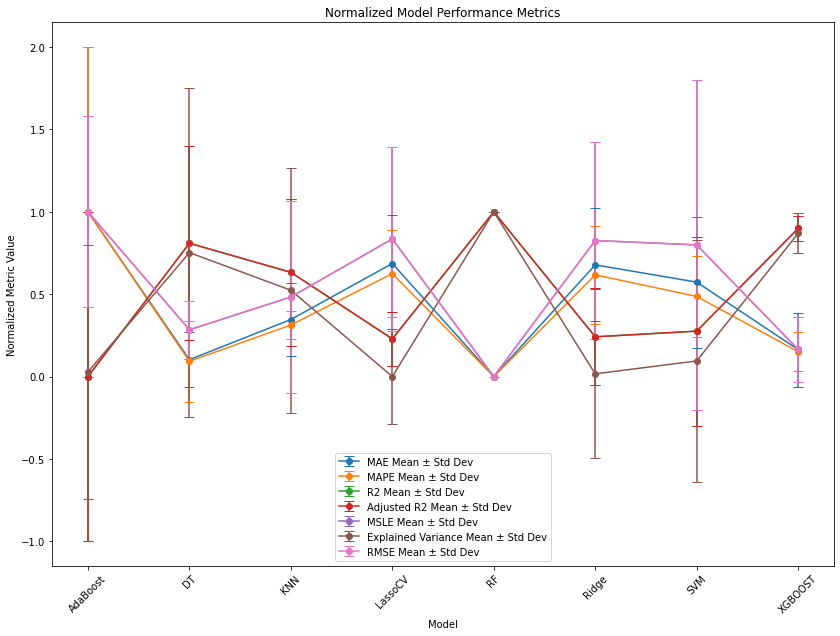

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the DataFrame
# results_df = pd.read_csv('path_to_your_results_df.csv')

# Calculate mean and standard deviation for each metric and each model
metrics = ['MAE', 'MAPE', 'R2', 'Adjusted R2', 'MSLE', 'Explained Variance', 'RMSE']
summary_df = results_df.groupby('Model')[metrics].agg(['mean', 'std'])

# Normalize the values
scaler = MinMaxScaler()

# Create a new DataFrame to store normalized values
normalized_df = pd.DataFrame(index=summary_df.index)

for metric in metrics:
    # Normalize mean and standard deviation
    mean_values = summary_df[(metric, 'mean')].values.reshape(-1, 1)
    std_values = summary_df[(metric, 'std')].values.reshape(-1, 1)
    
    normalized_mean = scaler.fit_transform(mean_values).flatten()
    normalized_std = scaler.fit_transform(std_values).flatten()
    
    normalized_df[f'{metric} Mean'] = normalized_mean
    normalized_df[f'{metric} Std'] = normalized_std

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))

for metric in metrics:
    y = normalized_df[f'{metric} Mean']
    yerr = normalized_df[f'{metric} Std']
    
    ax.errorbar(normalized_df.index, y, yerr=yerr, label=f'{metric} Mean ± Std Dev', fmt='-o', capsize=5)

# Customizing the plot
ax.set_title('Normalized Model Performance Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Metric Value')
ax.legend()
ax.set_xticks(normalized_df.index)
ax.set_xticklabels(normalized_df.index, rotation=45)

plt.show()


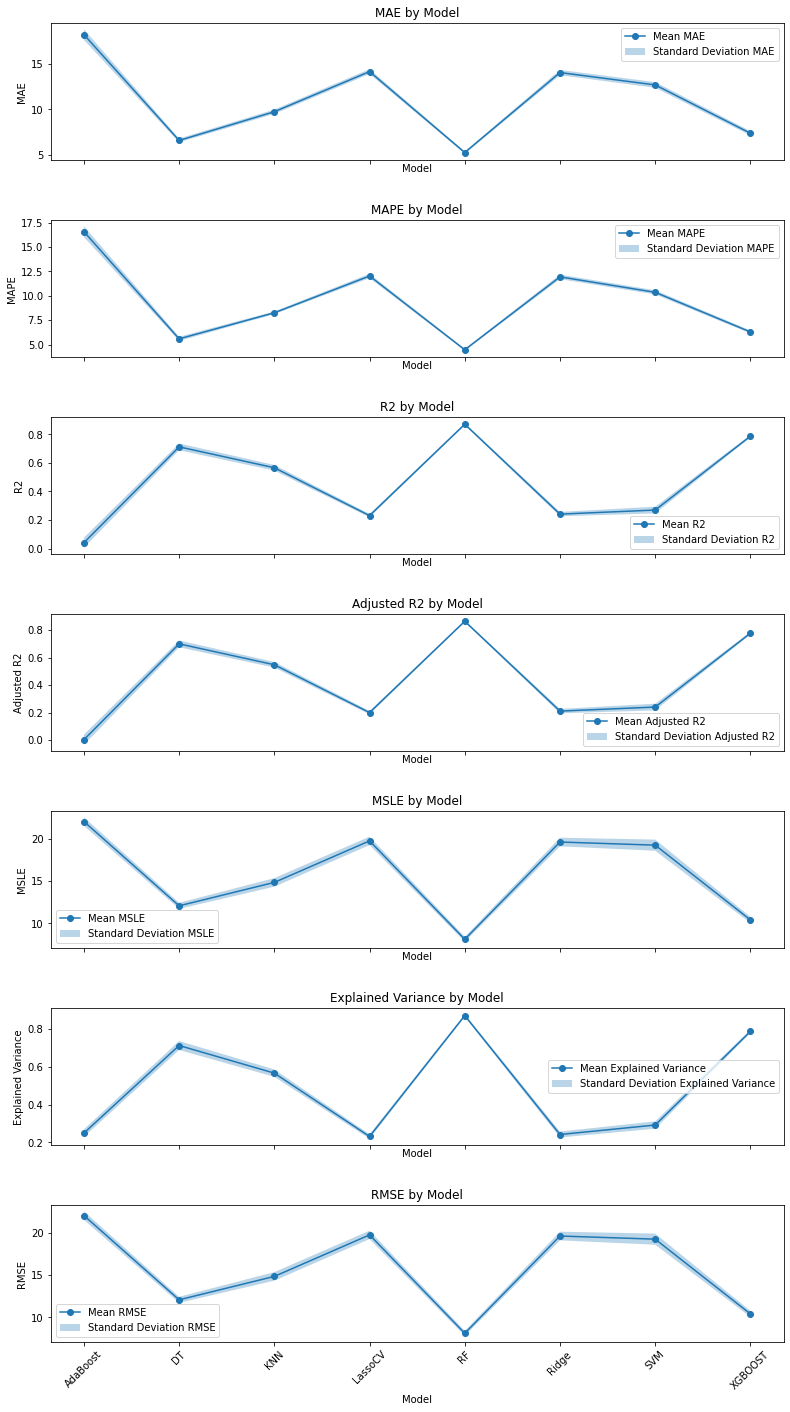

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
# results_df = pd.read_csv('path_to_your_results_df.csv')

# Calculate mean and standard deviation for each metric and each model
metrics = ['MAE', 'MAPE', 'R2', 'Adjusted R2', 'MSLE', 'Explained Variance', 'RMSE']
summary_df = results_df.groupby('Model')[metrics].agg(['mean', 'std'])

# Plotting
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 20), sharex=True)
fig.tight_layout(pad=5.0)

for i, metric in enumerate(metrics):
    ax = axes[i]
    x = summary_df.index
    y = summary_df[(metric, 'mean')]
    yerr = summary_df[(metric, 'std')]

    ax.plot(x, y, marker='o', label=f'Mean {metric}')
    ax.fill_between(x, y - yerr, y + yerr, alpha=0.3, label=f'Standard Deviation {metric}')
    ax.set_title(f'{metric} by Model')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [35]:
# Assuming you have a DataFrame named df_features
from sklearn.utils import resample
# Separate the data into three DataFrames based on glucose_level
normal_data = df_features[df_features['glucose_level'] == 'Normal']
high_data = df_features[df_features['glucose_level'] == 'High']
low_data = df_features[df_features['glucose_level'] == 'Low']

# Downsample the "Normal" values to match the count of the other categories
normal_downsampled = resample(normal_data, 
                              replace=False,  # Set to False for downsampling
                              n_samples=3070, #atch the count
                              random_state=42)  # Set a random state for reproducibility

high_downsampled = resample(high_data, 
                              replace=False,  # Set to False for downsampling
                              n_samples=3070, #atch the count
                              random_state=42)  # Set a random state for reproducibility

low_downsampled = resample(low_data, 
                              replace=False,  # Set to False for downsampling
                              n_samples=3070, #atch the count
                              random_state=42)  # Set a random state for reproducibility
# Combine the downsampled "Normal" data with the "High" and "Low" data
df_downsampled = pd.concat([normal_downsampled, high_downsampled, low_downsampled])

In [36]:
df_features = df_downsampled 

In [45]:
# Define models
models = {
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'RF': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'LDA': LDA(),
    'GNB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBOOST': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load your data (assuming df_features is your DataFrame)
# df_features = pd.read_csv('path_to_your_dataframe.csv')

numerical_features = ['HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew',
                      'HR_Q1G', 'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew',
                      'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew',
                      'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew',
                      'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew',
                      'BVP_Q1G', 'BVP_Q3G', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum',
                      'PeakEDA_2hrmean', 'maxHRV', 'minHRV', 'medianHRV', 'meanHRV', 'SDNN',
                      'NN50', 'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr',
                      'carbs2hr', 'calories8r', 'protien8hr', 'sugar8hr', 'carbs8hr',
                      'calories24hr', 'protien24hr', 'sugar24hr', 'carbs24hr', 'Eat',
                      'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr', 'Eatmean2hr', 'Eatmean8hr',
                      'Eatmean24hr', 'WakeTime', 'Minfrommid', 'Hourfrommid', 'EDA_Min',
                      'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min', 'Wake_Time',
                      'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical',
                      'ACC_Std_Historical', 'Activity_Bouts', 'Mean', 'Std',
                      'Activity24', 'Activity1h']

categorical_features = ['Participant', 'Gender']

# Encode the categorical features
X = df_features.drop(columns=['IG', 'glucose_level', 'Time', 'Date'])
X[numerical_features] = StandardScaler().fit_transform(X[numerical_features])
X.columns = X.columns.astype(str)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_features['glucose_level'])

# Define models
models = {
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'RF': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'LDA': LDA(),
    'GNB': GaussianNB(),
    'Ridge': RidgeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBOOST': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Initialize performance metric lists
results = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'Model: {name}')
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)
        elif hasattr(model, "decision_function"):
            decision_values = model.decision_function(X_test)
            # Convert decision function values to probabilities using softmax for multiclass
            if decision_values.ndim > 1:
                y_pred_proba = np.exp(decision_values) / np.sum(np.exp(decision_values), axis=1, keepdims=True)
            else:  # Binary case, use sigmoid function
                y_pred_proba = 1 / (1 + np.exp(-decision_values))
                y_pred_proba = np.vstack((1 - y_pred_proba, y_pred_proba)).T
        else:
            y_pred_proba = np.zeros_like(y_pred)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        if len(np.unique(y_test)) > 2:
            if y_pred_proba.ndim == 1:
                y_pred_proba = np.expand_dims(y_pred_proba, axis=1)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='macro')
        else:
            if y_pred_proba.ndim > 1:
                y_pred_proba = y_pred_proba[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)

        results.append({
            'Model': name,
            'Fold': fold,
            'Accuracy (%)': accuracy * 100,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('classification_performance_metrics.csv', index=False)

print("Model performance metrics have been saved to 'classification_performance_metrics.csv'.")

# Calculate mean and standard deviation for each metric for each model
mean_metrics = results_df.groupby('Model').mean()
std_metrics = results_df.groupby('Model').std()

# Display the mean performance metrics for each model
print("\nMean performance metrics for each model:")
print(mean_metrics)


Model: DT
Model: SVM
Model: RF
Model: KNN
Model: LDA
Model: GNB
Model: Ridge
Model: AdaBoost


In [62]:
results_df
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'Accuracy (%)'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_acc.csv')

Friedman's test statistic: 78.33583959899754
Friedman's test p-value: 1.0565631806307926e-13


In [55]:
results_df

,Model,Fold,Accuracy (%),Precision,Recall,F1-Score,ROC-AUC
0,DT,1,72.095548,0.722289,0.720955,0.720602,0.792420
1,DT,2,73.398480,0.732841,0.733985,0.733306,0.800784
2,DT,3,73.398480,0.733505,0.733985,0.732849,0.803288
3,DT,4,66.775244,0.665988,0.667752,0.666537,0.753624
4,DT,5,71.444083,0.713163,0.714441,0.713680,0.782787
...,...,...,...,...,...,...,...
85,XGBOOST,6,81.541802,0.813290,0.815418,0.812707,0.933712
86,XGBOOST,7,80.998914,0.808565,0.809989,0.806905,0.931937
87,XGBOOST,8,81.216069,0.809786,0.812161,0.810030,0.935981
88,XGBOOST,9,78.718784,0.788058,0.787188,0.783207,0.932896


In [63]:
nemenyi_result

,AdaBoost,DT,GNB,KNN,LDA,RF,Ridge,SVM,XGBOOST
AdaBoost,1.000000,0.216940,0.351152,0.611110,0.900000,0.013263,0.900000,0.900000,0.001042
DT,0.216940,1.000000,0.001000,0.900000,0.011480,0.900000,0.015290,0.809296,0.759750
GNB,0.351152,0.001000,1.000000,0.001042,0.900000,0.001000,0.900000,0.030146,0.001000
KNN,0.611110,0.900000,0.001042,1.000000,0.088655,0.759750,0.110517,0.900000,0.351152
LDA,0.900000,0.011480,0.900000,0.088655,1.000000,0.001000,0.900000,0.536793,0.001000
RF,0.013263,0.900000,0.001000,0.759750,0.001000,1.000000,0.001000,0.216940,0.900000
Ridge,0.900000,0.015290,0.900000,0.110517,0.900000,0.001000,1.000000,0.586338,0.001000
SVM,0.900000,0.809296,0.030146,0.900000,0.536793,0.216940,0.586338,1.000000,0.038985
XGBOOST,0.001042,0.759750,0.001000,0.351152,0.001000,0.900000,0.001000,0.038985,1.000000


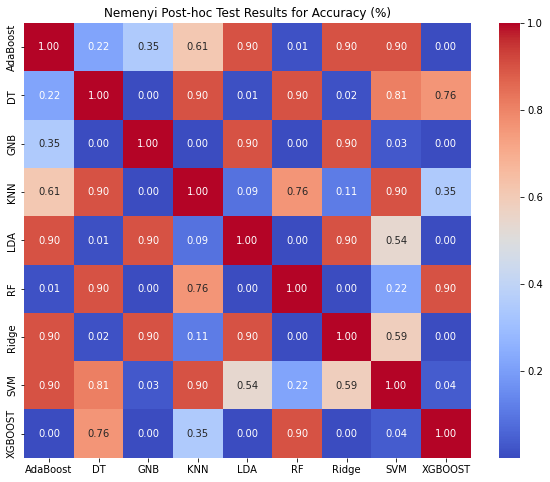

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for Accuracy (%)')
plt.savefig('Nemenyi Post-hoc Test Results for Accuracy (%).svg')
plt.show()

In [65]:
results_df
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'Precision'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_prec.csv')

Friedman's test statistic: 77.92000000000002
Friedman's test p-value: 1.2806808859967433e-13


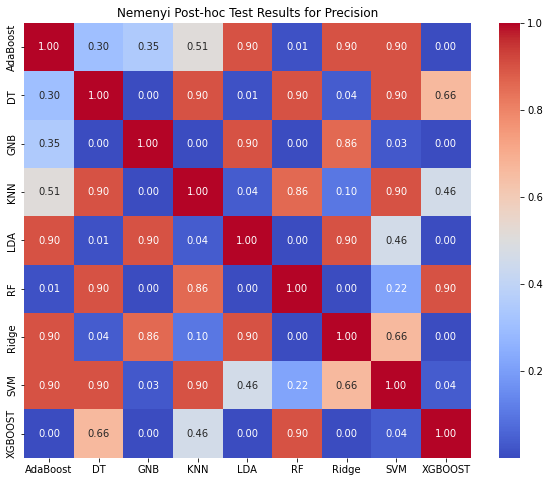

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for Precision')
plt.savefig('Nemenyi Post-hoc Test Results for Precision.svg')
plt.show()

Friedman's test statistic: 78.33583959899754
Friedman's test p-value: 1.0565631806307926e-13


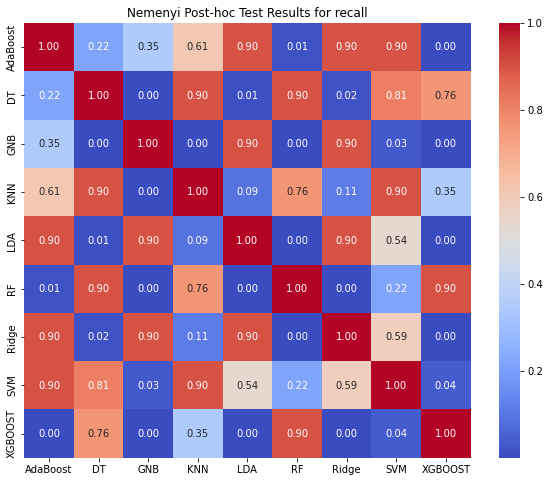

In [67]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'Recall'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_prec.csv')
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for recall')
plt.savefig('Nemenyi Post-hoc Test Results for recall.svg')
plt.show()

Friedman's test statistic: 77.81333333333333
Friedman's test p-value: 1.345443468032414e-13


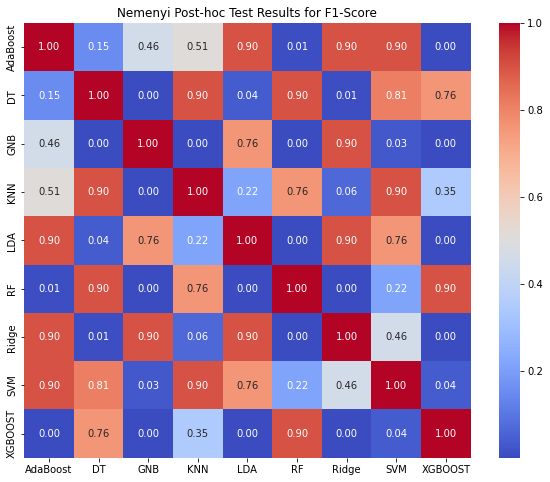

In [68]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'F1-Score'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_f1score.csv')
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for F1-Score')
plt.savefig('Nemenyi Post-hoc Test Results for f1score.svg')
plt.show()

Friedman's test statistic: 79.33333333333337
Friedman's test p-value: 6.658095636678496e-14


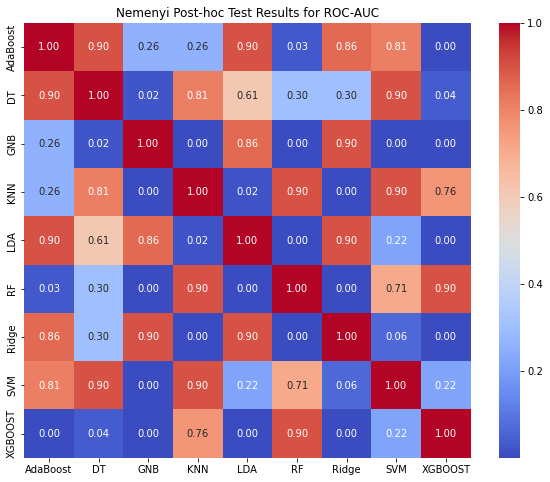

In [69]:
# Assuming results_df is the DataFrame with performance metrics for each fold and model
metric = 'ROC-AUC'  # Example metric

# Extract the metric values for each model
metric_values = [results_df[results_df['Model'] == model][metric].values for model in models.keys()]

# Perform Friedman's test
friedman_test_result = friedmanchisquare(*metric_values)
print(f"Friedman's test statistic: {friedman_test_result.statistic}")
print(f"Friedman's test p-value: {friedman_test_result.pvalue}")

# Create a DataFrame for the Nemenyi test
df_for_nemenyi = results_df.pivot(index='Fold', columns='Model', values=metric)

# Perform the Nemenyi post-hoc test
nemenyi_result = sp.posthoc_nemenyi_friedman(df_for_nemenyi)


# Save the Nemenyi test results to a CSV file
nemenyi_result.to_csv('nemenyi_test_results_f1score.csv')
plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True, fmt=".2f")
plt.title(f'Nemenyi Post-hoc Test Results for ROC-AUC')
plt.savefig('Nemenyi Post-hoc Test Results for ROC-AUC.svg')
plt.show()

In [97]:
results_df = pd.read_csv('classification_performance_metrics.csv')
results_df['Accuracy (%)']=results_df['Accuracy (%)']/100
results_df

,Model,Fold,Accuracy (%),Precision,Recall,F1-Score,ROC-AUC
0,DT,1,0.720955,0.722289,0.720955,0.720602,0.792420
1,DT,2,0.733985,0.732841,0.733985,0.733306,0.800784
2,DT,3,0.733985,0.733505,0.733985,0.732849,0.803288
3,DT,4,0.667752,0.665988,0.667752,0.666537,0.753624
4,DT,5,0.714441,0.713163,0.714441,0.713680,0.782787
...,...,...,...,...,...,...,...
85,XGBOOST,6,0.815418,0.813290,0.815418,0.812707,0.933712
86,XGBOOST,7,0.809989,0.808565,0.809989,0.806905,0.931937
87,XGBOOST,8,0.812161,0.809786,0.812161,0.810030,0.935981
88,XGBOOST,9,0.787188,0.788058,0.787188,0.783207,0.932896


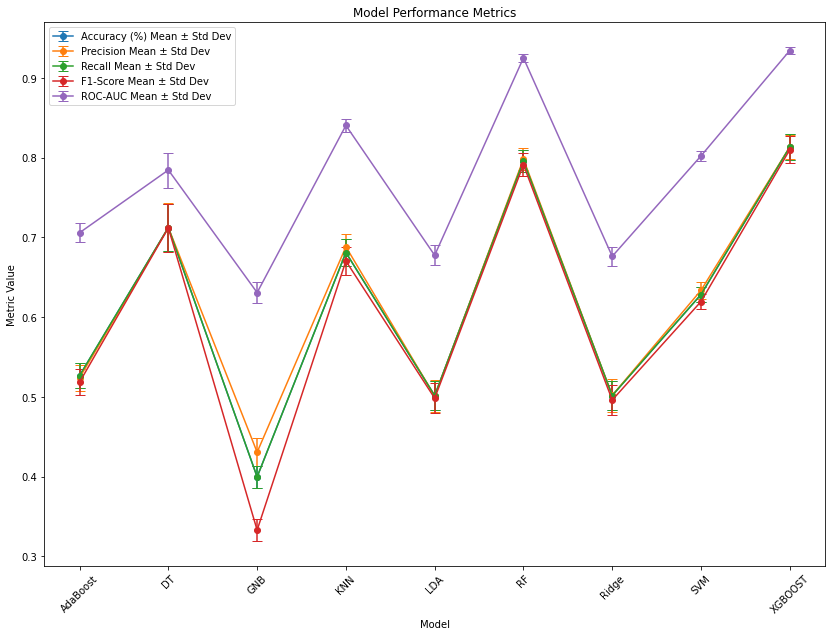

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame
results_df = pd.read_csv('classification_performance_metrics.csv')
results_df['Accuracy (%)']=results_df['Accuracy (%)']/100
# Calculate mean and standard deviation for each metric and each model
metrics = ['Accuracy (%)', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
summary_df = results_df.groupby('Model')[metrics].agg(['mean', 'std'])

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))

for metric in metrics:
    y = summary_df[(metric, 'mean')]
    yerr = summary_df[(metric, 'std')]
    
    ax.errorbar(summary_df.index, y, yerr=yerr, label=f'{metric} Mean ± Std Dev', fmt='-o', capsize=5)

# Customizing the plot
ax.set_title('Model Performance Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Metric Value')
ax.legend()
ax.set_xticks(summary_df.index)
ax.set_xticklabels(summary_df.index, rotation=45)
plt.savefig('classification_performance.svg')
plt.show()